# Lab 4 - Classification with NN

Debe formar grupo de hasta 3 personas para los laboratorios.

__Estudiante 1:__ Leonardo Achá Boiano  
__Estudiante 2:__ Matias Adorno Mazocatto  
__Estudiante 3:__ Adrian Carhuaz  
__Estudiante 3:__ Bruno Ramiro Rejas Montero


__Fecha de inicio:__ 10 de Mayo del 2023 \
__Fecha de entrega:__  18 de Mayo del 2023 (11:59 pm)

## Introduction
Has sido contratado en una empresa, superVegs,  es una empresa de cadena de suministro de productos frescos. Son pioneros en resolver uno de los problemas de la cadena de suministro más difíciles del mundo al aprovechar la tecnología innovadora. Un componente integral de su proceso de automatización es el desarrollo de clasificadores robustos que pueden distinguir entre imágenes de diferentes tipos de vegetales, mientras que también etiquetan correctamente las imágenes que no contienen ningún tipo de vegetal.

Como nuevo integrante de la empresa se nos ha encomendado la elaboración de un clasificador multiclase para la identificación de distintos tipos de vegetales. Para ello se estara usando el siguiente dataset [Kaggle Vagetable Image Dataset](https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset)

## Instructions 
Bienvenido a tu primera semana de trabajo en la cual debes crear una aplicaciones de visión artificial! En particular, un clasificador!! 

Específicamente, se quiere:

- Analizar y preprocesar el dataset
- Implementar una serie de models clasificadores 
- Comparar una serie de modelo clasificadores de imágenes en nuevos datos
- Medir el rendimiento de los mejores modelos de clasificación en datos de prueba y en el mundo real.
- (Optional) Implementar una aplicación [Gradio](https://gradio.app/quickstart/) que se pueda ejecutar en su teléfono o laptop


## Requerimientos 
Kaggle es uno de los mejores lugares para practicar, mejorar y mostrar su habilidad de ML.

Lo más importante es que obtendremos **GPU gratis 30 horas por semana.**

Por lo tanto, se recomienda usar Kaggle Kernels para la mayoría de sus experimentos.


Su Notebook debe tener lo siguiente:

- Analizar los datos
- Cargar los datos
- Configurar varios modelos de NN
- Métricas de evaluación
- Entrenamiento y Validación
- Experimentos en imagenes Reales
- Enlace de perfil de Kaggle o a la notebook

## Imports

In [52]:
import os, pathlib

import numpy as np
import matplotlib.pyplot as plt

import random
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 0. Check GPU Availability

In [6]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev) 

In [7]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print("Using GPU")
else:
    device = torch.device('cpu')
    print("Using CPU")

Using GPU


## 1. Exploratory Data Analysis¶

La mayoría de los datasets se dividen en diferentes divisiones. Por ejemplo, a menudo verá un subconjunto de datos de entrenamiento, que se usa para construir el modelo, un subconjunto de datos de validación, que se usa para medir el rendimiento del modelo mientras se entrena, y un conjunto de datos de prueba que se usa para medir el rendimiento del modelo al final del entrenamiento, y generalmente se considera qué tan bien funcionará el modelo en el mundo real.

Específicamente, usaremos el conjunto de datos de vegetales que está disponible de forma gratuita en Kaggle: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

### TODO 
- Cargar las imagenes 
- Revisar el tipo de las imagenes y sus caracteristicas
- Revisar al menos una imagen por clase
- Analizar la distribucion de imagenes por clases 
- Cualquier otro analisis que desee realizar


In [8]:
data_dir = './VegetableImages'
train_dir = os.path.join(data_dir,"train")
test_dir = os.path.join(data_dir,"validation")
validation_dir = os.path.join(data_dir,"test")

# TODO: Debe cargar las imagenes y ver que tipo de imagenes se tiene
#       Revisar una imagen por clase
#       La distribucion de las clases 
#       Cualquier otro analisis que desee realizar

Get Number of Classes in Dataset.

In [9]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    total = 0
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            file_number=len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])
            total+=file_number
            print(f"There are {file_number} files in {str(path.name)}")
    print(f'Total = {total} files')

In [10]:
print('TRAIN SET')
count_files(os.path.join(train_dir))

TRAIN SET
There are 1000 files in Bean
There are 1000 files in Bitter_Gourd
There are 1000 files in Bottle_Gourd
There are 1000 files in Brinjal
There are 1000 files in Broccoli
There are 1000 files in Cabbage
There are 1000 files in Capsicum
There are 1000 files in Carrot
There are 1000 files in Cauliflower
There are 1000 files in Cucumber
There are 1000 files in Papaya
There are 1000 files in Potato
There are 1000 files in Pumpkin
There are 1000 files in Radish
There are 1000 files in Tomato
Total = 15000 files


In [11]:
print('TEST SET')
count_files(os.path.join(test_dir))

TEST SET
There are 200 files in Bean
There are 200 files in Bitter_Gourd
There are 200 files in Bottle_Gourd
There are 200 files in Brinjal
There are 200 files in Broccoli
There are 200 files in Cabbage
There are 200 files in Capsicum
There are 200 files in Carrot
There are 200 files in Cauliflower
There are 200 files in Cucumber
There are 200 files in Papaya
There are 200 files in Potato
There are 200 files in Pumpkin
There are 200 files in Radish
There are 200 files in Tomato
Total = 3000 files


In [12]:
print('VALIDATION SET')
count_files(os.path.join(validation_dir))

VALIDATION SET
There are 200 files in Bean
There are 200 files in Bitter_Gourd
There are 200 files in Bottle_Gourd
There are 200 files in Brinjal
There are 200 files in Broccoli
There are 200 files in Cabbage
There are 200 files in Capsicum
There are 200 files in Carrot
There are 200 files in Cauliflower
There are 200 files in Cucumber
There are 200 files in Papaya
There are 200 files in Potato
There are 200 files in Pumpkin
There are 200 files in Radish
There are 200 files in Tomato
Total = 3000 files


In [13]:
train_images = datasets.ImageFolder(train_dir)
test_images = datasets.ImageFolder(test_dir)
validation_images = datasets.ImageFolder(validation_dir)

In [14]:
def plot_subset(dataset, n=10, nrows=3, ncols=5):
    """
    Plot a subset of n images from the given dataset.

    Args:
        dataset (torchvision.datasets.ImageFolder): The ImageFolder dataset.
        n (int, optional): Number of images to plot. Defaults to 10.
        nrows (int, optional): Number of rows in the grid layout. Defaults to 2.
        ncols (int, optional): Number of columns in the grid layout. Defaults to 5.
    """

    subset_indices = random.sample(range(len(dataset)), n)
    subset = torch.utils.data.Subset(dataset, subset_indices)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5))

    for idx, (image, label) in enumerate(subset):
        ax = axes[idx // ncols, idx % ncols]
        image = transforms.ToTensor()(image)  # Convert PIL image to PyTorch tensor
        ax.imshow(image.permute(1, 2, 0))
        ax.set_title(dataset.classes[label])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

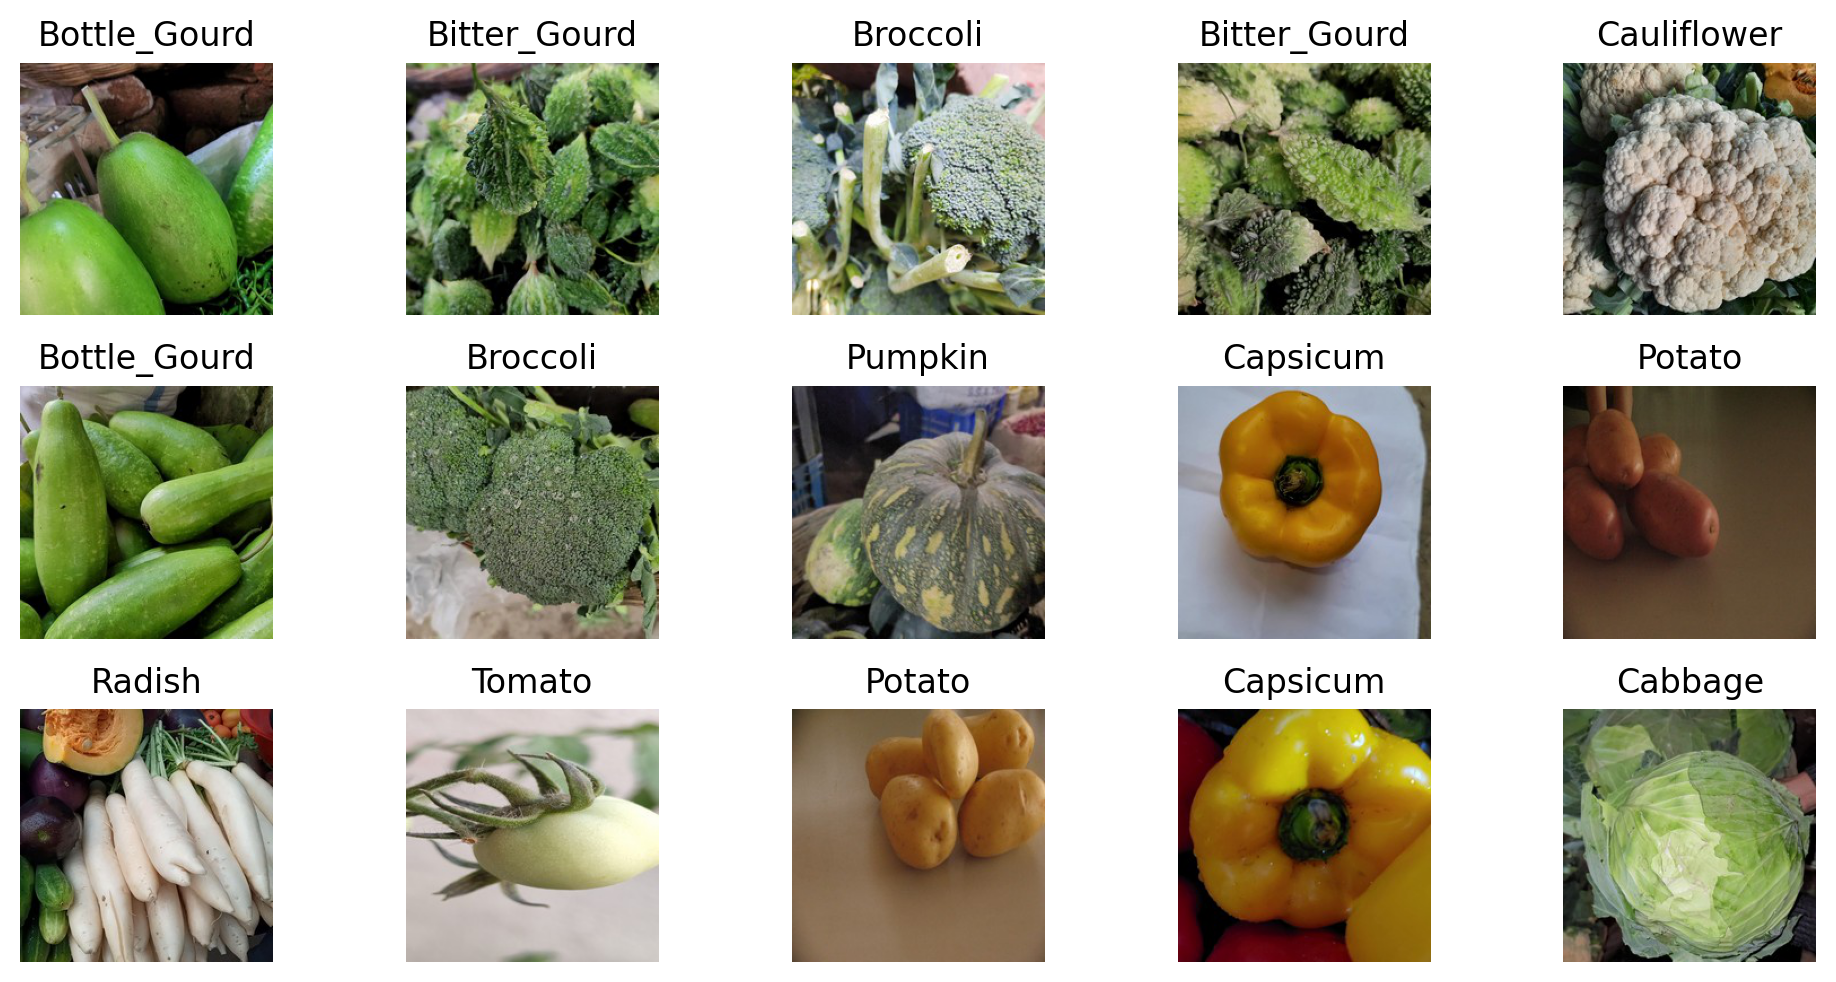

In [15]:
plot_subset(train_images, n=15)

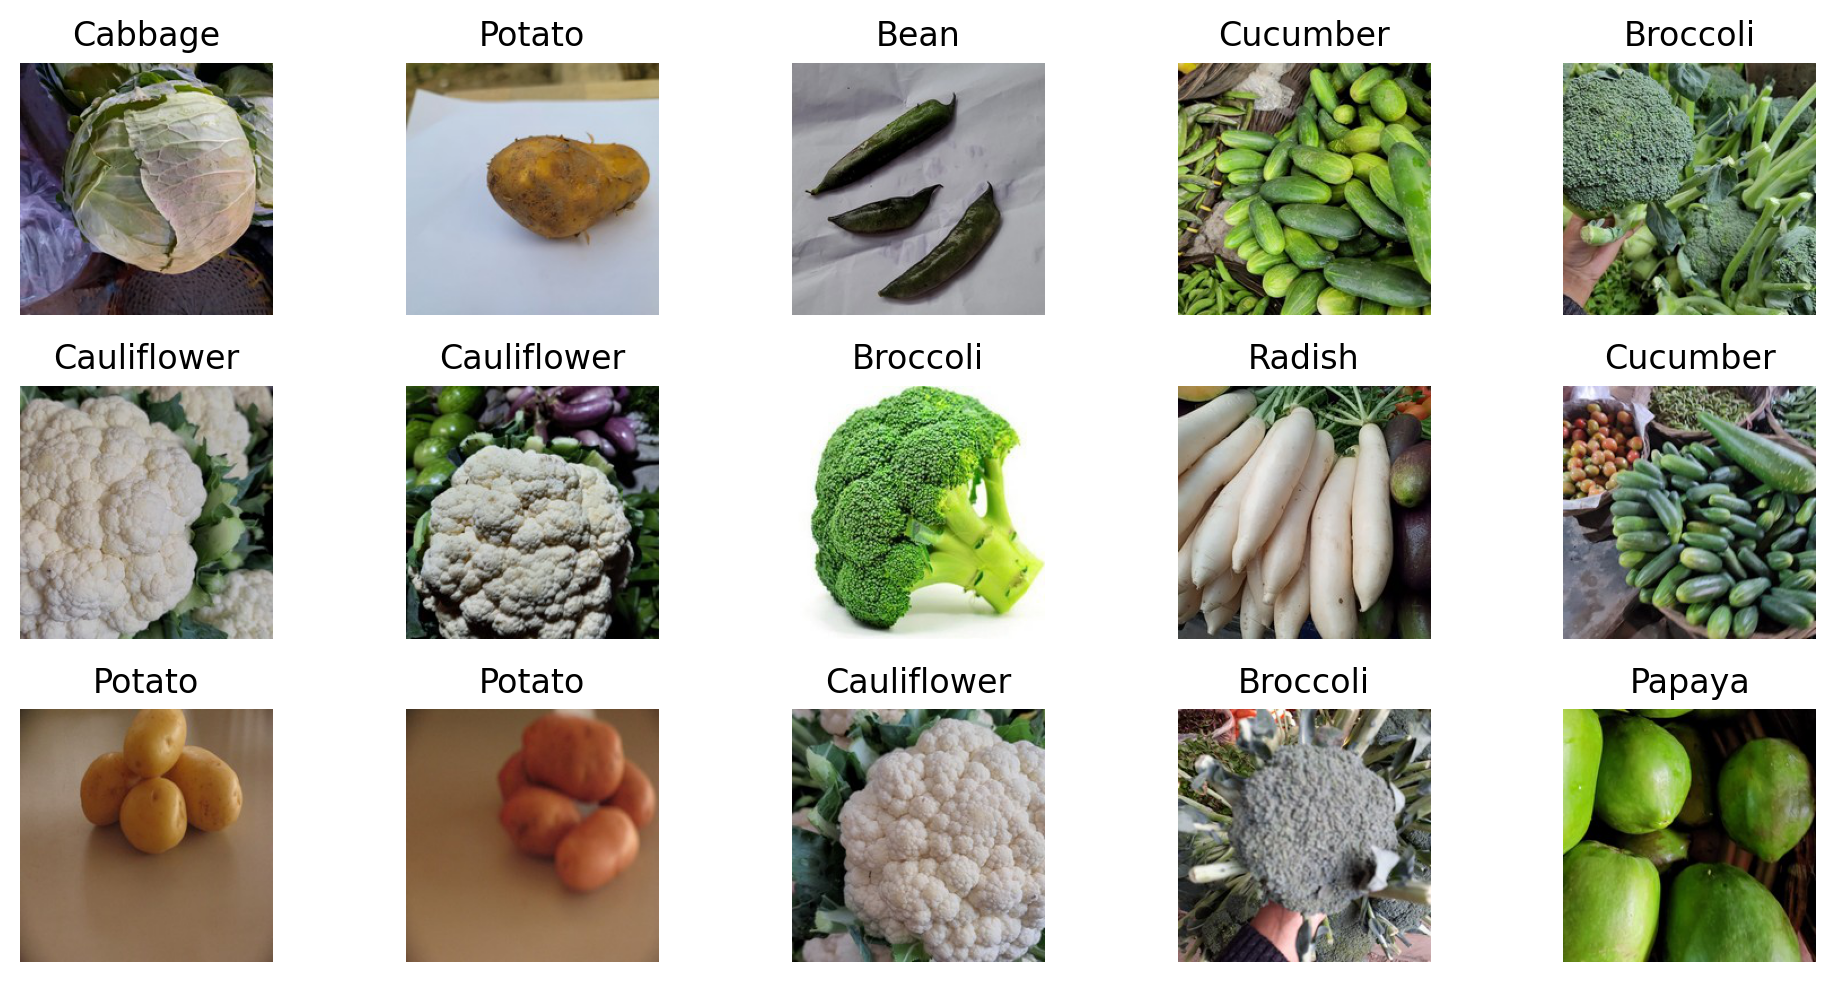

In [16]:
plot_subset(test_images, n=15)

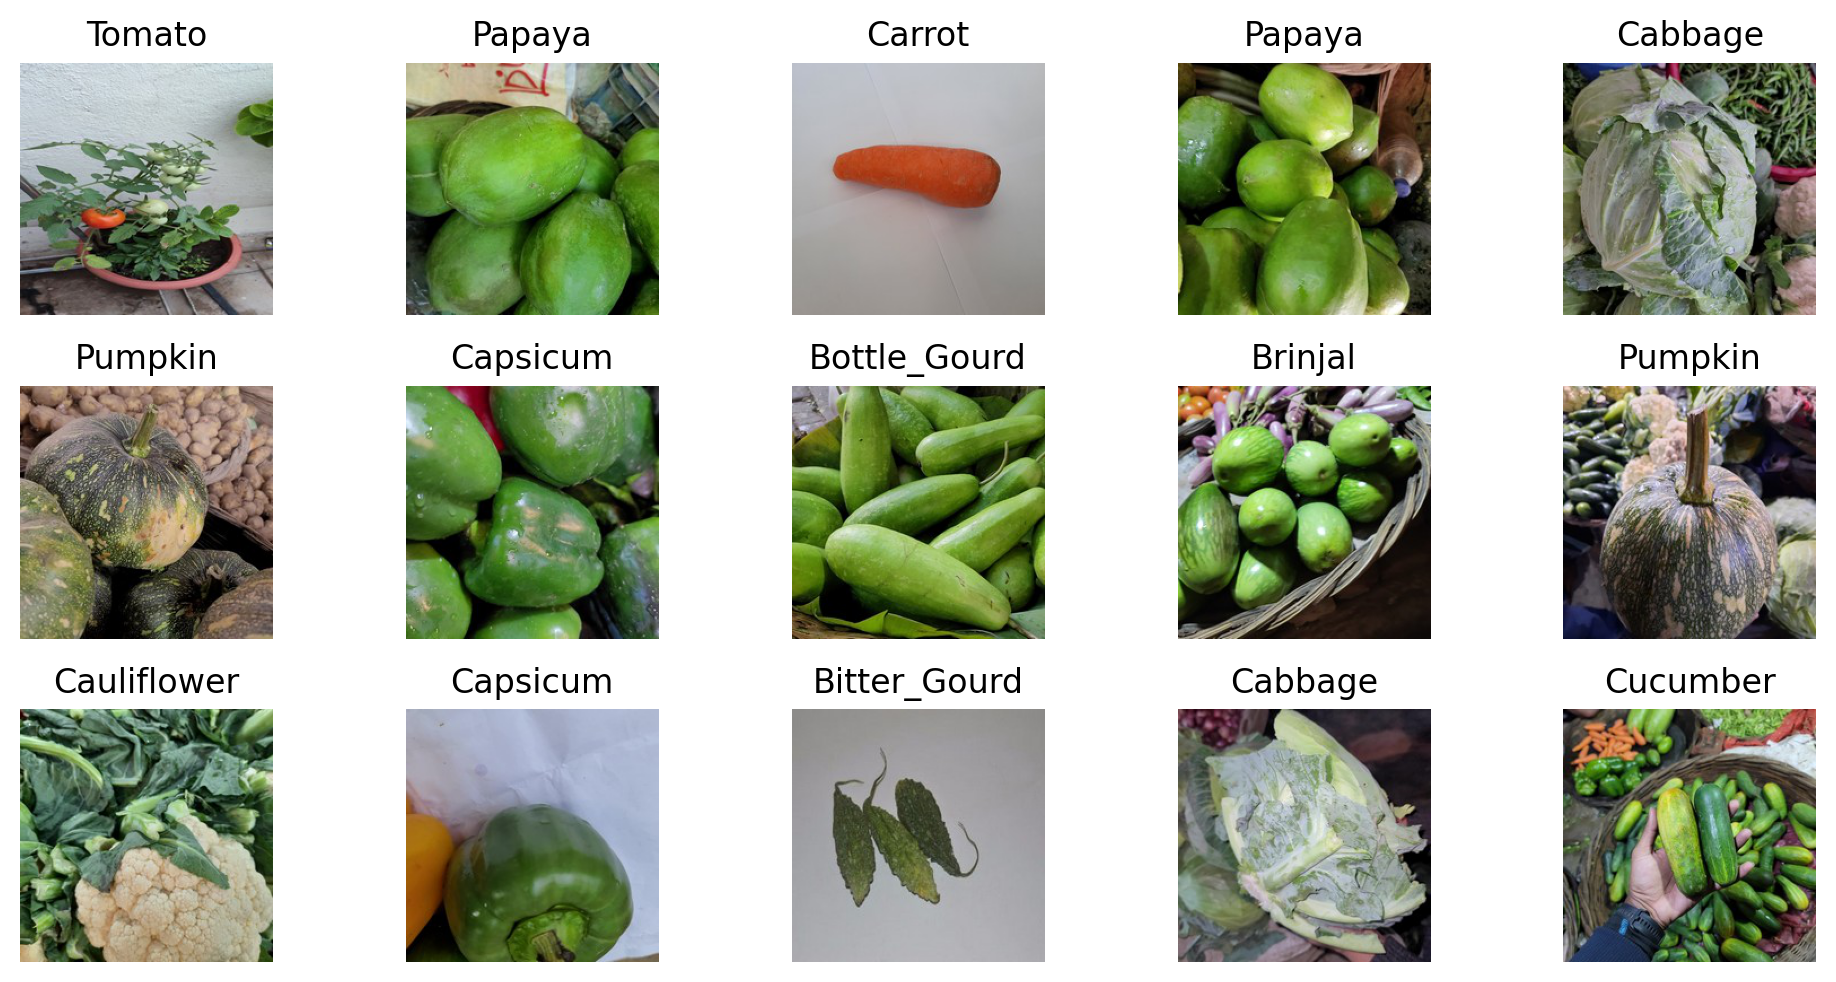

In [17]:
plot_subset(validation_images, n=15)

## 2. Loading Dataset and Data Preprocessing

In [18]:
data_dir = './vegetable'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),  # Voltea horizontalmente las imágenes de forma aleatoria
    transforms.Normalize((0.5), (0.5))
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data =  datasets.ImageFolder(test_dir, transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

### Questions

1) ¿Qué información tenemos para cada muestra? 

    __answer__

    
2) ¿Cuántas muestras de entrenamiento tenemos? ¿Muestras de validación? ¿Muestras de prueba? 

    __answer__


3) ¿Cuántas clases diferentes hay en este conjunto de datos y cuáles son las etiquetas de clase? 

    __answer__


4) Mirando las primeras 10 imágenes de entrenamiento, ¿nota algo interesante sobre las imágenes en el conjunto de datos? ¿Son tan diversos/representativos como cabría esperar o tienen limitaciones? 

    __answer__


## 3. Simple Neural Network (MLP)
- Crear un modelo MLP
- Describir su arquitectura del modelo (Revisar ejemplo)
- Entrenar el modelo, debe probar con varios hyperparameter (learning rate, batch_size, dropout)
- Evaluar el modelo 
    - Train Accuracy vs Epochs, Val Accuracy vs Epochs
    - Train Loss vs Epochs, Val Loss vs Epochs
    - Confusion Matrix
- Guardar su modelo en una carpeta `saved_models`

In [19]:
def save_model(model, file_name):
    file_path = os.path.join('./saved_models', file_name)
    os.makedirs('./saved_models', exist_ok=True)

    checkpoint = {'input_size': model.input_size,
                  'hidden_size': model.hidden_size,
                  'num_classes': model.num_classes,
                  'state_dict': model.state_dict()}

    torch.save(checkpoint, file_path)

def load_checkpoint(file_name, network_class):
    file_path = os.path.join('./saved_models', file_name)
    checkpoint = torch.load(file_path)
    model = network_class(checkpoint['input_size'],
                        checkpoint['hidden_size'],
                        checkpoint['num_classes'])
    model.load_state_dict(checkpoint['state_dict'])
    return model

In [28]:
def validation(model, testloader, criterion):
    accuracy = 0
    test_loss = 0
    for images, labels in testloader:

        images = images.view(images.shape[0], -1)
        
        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ## Calculating the accuracy 
        # Model's output is log-softmax, take exponential to get the probabilities
        ps = torch.exp(output)
        # Class with highest probability is our predicted class, compare with true label
        equality = (labels.data == ps.max(1)[1])
        # Accuracy is number of correct predictions divided by all predictions, just take the mean
        accuracy += equality.type_as(torch.FloatTensor()).mean()

    return test_loss, accuracy

In [21]:
def train(model, trainloader, testloader, criterion, optimizer, num_epochs=5, print_every=50):
    steps = 0
    running_loss = 0
    train_losses=[]

    for epoch in range(num_epochs):
        
        # Model in training mode, dropout is on
        model.train()

        for images, labels in trainloader:
            steps += 1
            
            # Flatten images into a long vector
            images = images.view(images.shape[0], -1)

            # Poner a cero los gradientes acumulados en cada iteración
            optimizer.zero_grad()

            # Forward pass
            outputs = model.forward(images)
            loss = criterion(outputs, labels)

            # Backward pass y optimización
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if steps % print_every == 0:
                # Model in inference mode, dropout is off
                model.eval()
                
                # Turn off gradients for validation, will speed up inference
                with torch.no_grad():
                    test_loss, accuracy = validation(model, testloader, criterion)
                
                train_loss = running_loss / print_every
                train_losses.append(train_loss)
                print("Epoch: {}/{}.. ".format(epoch + 1, num_epochs),
                      "Training Loss: {:.3f}.. ".format(train_loss),
                      "Test Loss: {:.3f}.. ".format(test_loss / len(testloader)),
                      "Test Accuracy: {:.3f}".format(accuracy / len(testloader)))
                
                running_loss = 0
                model.train()

    # Plotting the training loss
    plt.plot(train_losses)
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('Training Loss')
    plt.title('Training Loss')
    plt.show()

In [142]:
def inference_validation(model, testloader, test_images):
    model.eval()

    dataiter = iter(testloader)
    images, labels = next(dataiter)
    img = images[0]
    
    # Convert image to 1D vector
    img = img.view(1, 224*224*3)

    # Calculate the class probabilities (softmax) for img
    with torch.no_grad():
        output = model.forward(img)

    # Plot the image and probabilities

    ps = torch.exp(output).data.numpy().squeeze()
    img = img.view(3, 224, 224)
    # Transpose the dimensions of the image tensor
    img = img.permute(1, 2, 0)

    fig, (ax1, ax2) = plt.subplots(figsize=(8,4), ncols=2)
    ax1.imshow(img)
    #ax1.axis('off')
    ax1.set_title(test_images.classes[labels[0]])
    
    ax2.barh(np.arange(15), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(15))
    ax2.set_yticklabels(test_images.classes, size='small')
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.suptitle('MLP_0 Model Inference')
    plt.tight_layout()
    plt.subplots_adjust(top=0.89)
    plt.show()

In [22]:
# Definir una MLP personalizada
class MLP_0(nn.Module):
    ''' 
    Builds a MLP network with arbitrary hidden layers.
        
    Arguments
    ---------
    input_size: integer, size of the input layer
    output_size: integer, size of the output layer
    hidden_layers: list of integers, the sizes of the hidden layers
        
    '''
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP_0, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [23]:
# Definir el modelo MLP
input_size = 224*224*3  # Tamaño de las imágenes aplanadas (224x224 píxeles x 3 canales RGB)
hidden_size = 120  # número de neuronas por fcl
num_classes = 15  # número de clases
model = MLP_0(input_size, hidden_size, num_classes)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Epoch: 1/12..  Training Loss: 1.652..  Test Loss: 1.333..  Test Accuracy: 0.579
Epoch: 2/12..  Training Loss: 1.134..  Test Loss: 1.124..  Test Accuracy: 0.645
Epoch: 3/12..  Training Loss: 0.921..  Test Loss: 0.978..  Test Accuracy: 0.706
Epoch: 4/12..  Training Loss: 0.798..  Test Loss: 0.924..  Test Accuracy: 0.703
Epoch: 5/12..  Training Loss: 0.671..  Test Loss: 0.798..  Test Accuracy: 0.753
Epoch: 6/12..  Training Loss: 0.612..  Test Loss: 0.744..  Test Accuracy: 0.776
Epoch: 6/12..  Training Loss: 0.516..  Test Loss: 0.775..  Test Accuracy: 0.766
Epoch: 7/12..  Training Loss: 0.457..  Test Loss: 0.701..  Test Accuracy: 0.792
Epoch: 8/12..  Training Loss: 0.391..  Test Loss: 0.669..  Test Accuracy: 0.801
Epoch: 9/12..  Training Loss: 0.362..  Test Loss: 0.642..  Test Accuracy: 0.813
Epoch: 10/12..  Training Loss: 0.320..  Test Loss: 0.675..  Test Accuracy: 0.801
Epoch: 11/12..  Training Loss: 0.277..  Test Loss: 0.616..  Test Accuracy: 0.818
Epoch: 12/12..  Training Loss: 0.245..

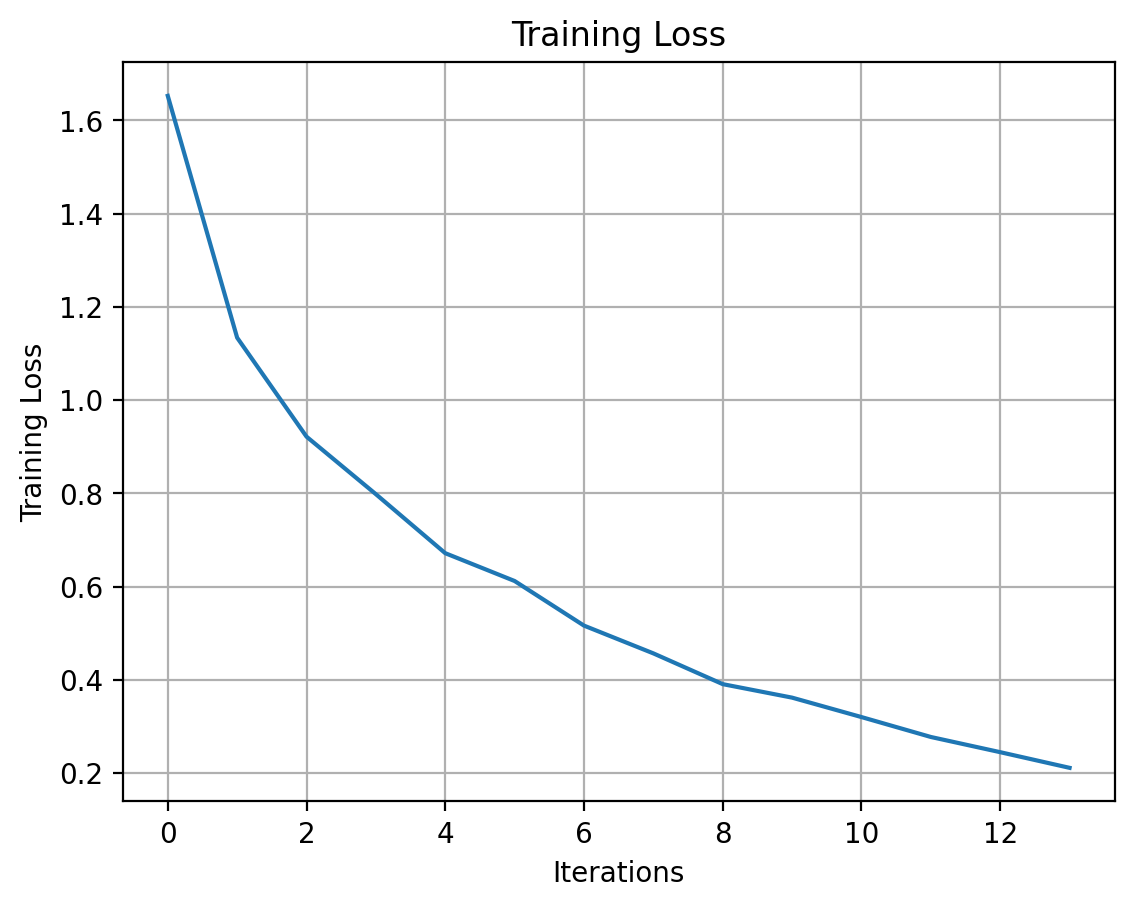

In [24]:
to_train=0
if to_train==1:
    # Call the train function
    train(model, trainloader, testloader, criterion, optimizer, num_epochs=12, print_every=200)
    # Save the model
    save_model(model, file_name='mlp_00_00_leo.pth')

In [27]:
x = load_checkpoint('mlp_00_00_leo.pth', MLP_0)
print(x)

MLP_0(
  (fc1): Linear(in_features=150528, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=15, bias=True)
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


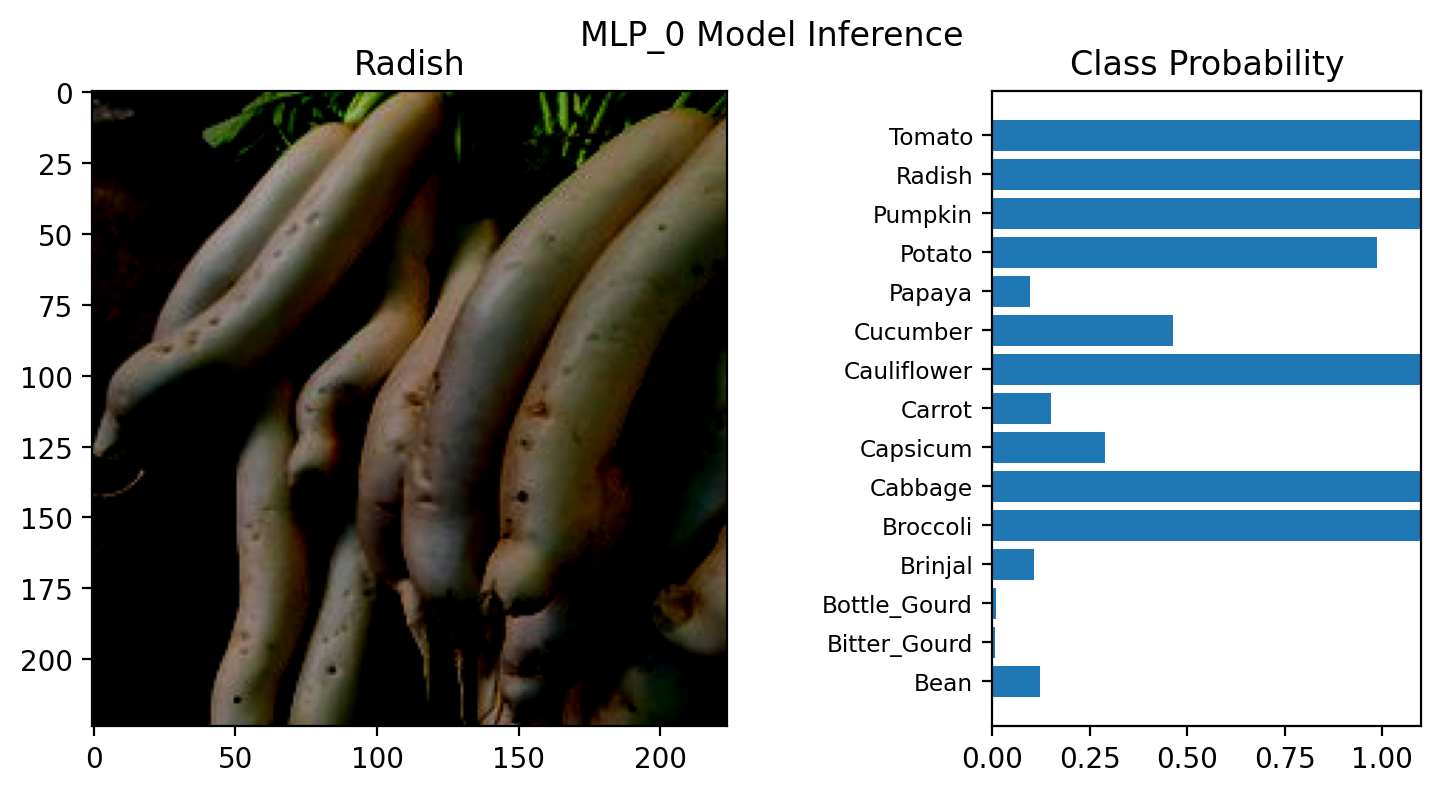

In [143]:
inference_validation(x, testloader, test_images)

In [ ]:
class MLP_1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # New fc layer
        self.fc3 = nn.Linear(hidden_size, num_classes)  # New fc layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))  # Apply activation to the output of the second fc layer
        x = self.fc3(x)  # No activation function applied to the output of the third fc layer
        return x

## 4.  Simple CNN
- Crear un modelo CNN simple (no muy profundo)
- Describir su arquitectura del modelo (Revisar ejemplo)
- Entrenar el modelo, debe probar con varios hyperparameter (learning rate, batch_size, dropout)
- Evaluar el modelo 
    - Train Accuracy vs Epochs, Val Accuracy vs Epochs
    - Train Loss vs Epochs, Val Loss vs Epochs
    - Confusion Matrix
- Guardar su modelo en una carpeta `saved_models`

## 5. Deeper CNN Model (add more CNN and max pooling) 
- Crear un modelo Deep CNN
- Describir su arquitectura del modelo (Revisar ejemplo)
- Entrenar el modelo, debe probar con varios hyperparameter (learning rate, batch_size, dropout)
- Evaluar el modelo 
    - Train Accuracy vs Epochs, Val Accuracy vs Epochs
    - Train Loss vs Epochs, Val Loss vs Epochs
    - Confusion Matrix
- Guardar su modelo en una carpeta `saved_models`

## 6. Transfer Learning
- Crear un modelo utilizando la tecnica Transfer Learning
- Describir su arquitectura del modelo (Revisar ejemplo)
- Entrenar el modelo, debe probar con varios hyperparameter (learning rate, batch_size, dropout)
- Evaluar el modelo 
    - Train Accuracy vs Epochs, Val Accuracy vs Epochs
    - Train Loss vs Epochs, Val Loss vs Epochs
    - Confusion Matrix
- Guardar su modelo en una carpeta `saved_models`

Puede usar alguna de las siguientes opciones:
- VGG-16
- ResNet
- DenseNet

## 7. Checking Predictions with the best models 

- Seleccione sus dos mejores modelos y comparelos.
- Encuentre en que imagenes estos modelos se equivocan con frecuencia
- Evalue estos modelos usando imagenes tomadas por usted

## 8. Conclusions
Escriba sus `findings`. Es decir, un resumen de cada modelo su accuracy, loss, metodos, dificultades. 

## Question

### 1) Explique la relación entre el batchsize y el learning rate. ¿Qué es el overfitting? ¿Cómo se puede detectar y evitar el overfitting?

    __answer__

### 2) Comente la diferencia de desempeño entre los modeles y la clasificación obtenida

    __answer__
    
### 3) En que imagenes sus modelos suelen equivocarse? Por que cree que esto ocurre? Como podria mejorar lo?

    __answer__



## Deployment and test on "real" data (Optional)

La llegada del [Gradio Tutorial](https://gradio.app/quickstart/) ha facilitado mucho este proceso. Si bien aún necesitará TensorFlow o PyTorch para entrenar el modelo en sí, simplemente puede usar gradio para implementar el modelo, almacenar datos y crear una interfaz de usuario. Lo mejor de todo es que cada paso de este proceso se puede lograr con Python. ¡Puede usar esta biblioteca para crear fácilmente demos de ML!

Ejemplo de `gradio`. Cuando se introduce el nombre `Jose Jesus` en la primera entrada, la segunda muestra una salida `Hello Jose Jesus!`

```python
import gradio as gr

def greet(name):
 return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")
demo.launch()
```

![Text](./images/image1.png)

### Un ejemplo de imagen
Gradio admite muchos tipos de componentes, como imagen, marco de datos, video o etiqueta. ¡Probemos una función de imagen a imagen para tener una idea de esto!

```python
import numpy as np
import gradio as gr

def sepia(input_img):
    sepia_filter = np.array([
        [0.393, 0.769, 0.189], 
        [0.349, 0.686, 0.168], 
        [0.272, 0.534, 0.131]
    ])
    sepia_img = input_img.dot(sepia_filter.T)
    sepia_img /= sepia_img.max()
    return sepia_img

demo = gr.Interface(sepia, gr.Image(shape=(200, 200)), "image")
demo.launch()
```

![Text](./images/image2.png)

## Upload your demo

* **Crea una cuenta de Hugging Face y sube tu demo a Spaces**

1. Cree una cuenta gratuita de Hugging Face si aún no tiene una: https://huggingface.co/login
1. Cree un nuevo espacio **público** con el código para su aplicación Gradio. Puede encontrar útil este tutorial: https://huggingface.co/blog/gradio-spaces (Tenga en cuenta que además de cargar el código para su demostración de Gradio, también deberá cargar los archivos de modelo guardados y algunas imágenes de ejemplo, así como un archivo `requirements.txt`).
1. Una vez que se inicie su aplicación, coloque el enlace a su espacio aquí:

__answer__